In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import time
import os
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:

path_json = '/home/kotvkaske/MATHEMATICAL_WORKSHOP/'
files = os.listdir(path_json+'data_new/')
#with open (path_json+'/data_new/1dh1e3d93h944idh991i576e48917264_13604_129570_read_records_per_second.json') as f:
with open (path_json+'/data_new/'+files[28]) as f:
    first = json.load(f)


In [3]:
files[13]

'i6dg8515940i42f488h927if637d56i4_13438_132272_read_records_per_second.json'

In [4]:
result=pd.json_normalize(first['datapoints'])
result.drop("unit",axis=1,inplace=True)
result.head()

,average,timestamp
0,782.19,1541174400000
1,737.94,1541174700000
2,820.31,1541175000000
3,885.63,1541175300000
4,748.18,1541175600000


In [5]:
result['timestamp']=pd.to_datetime(result['timestamp'],unit='ms')
X=result['timestamp']
Y=result['average']
X_train = X[0:round(2*len(X)/3)]
Y_train = Y[0:round(2*len(Y)/3)]
X_test=X[round(2*len(X)/3):]
Y_test=Y[round(2*len(Y)/3):]

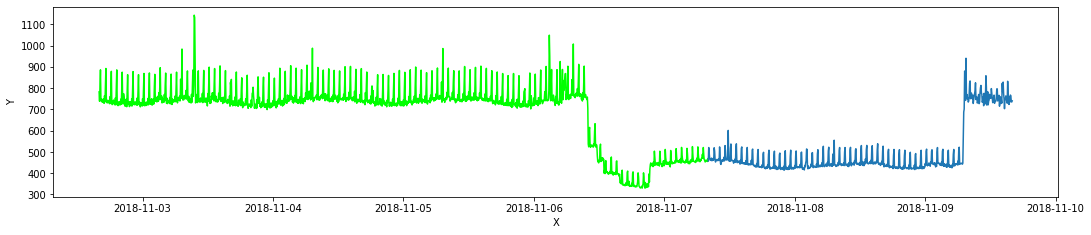

In [6]:
plt.figure(figsize=(18, 3.5))
plt.plot(X_train,Y_train, color='lime')
plt.plot(X_test,Y_test)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
mean_avg = mean(result['average'])
mean_avg

630.5672583044125

In [8]:
def moving_average(series,k,n):
    return np.average(series[k:n])

moving_average(Y,60,100)

748.7855

In [9]:
#def plotMovAvg (data,n):
print(Y)   
    

0       782.19
1       737.94
2       820.31
3       885.63
4       748.18
         ...  
2012    767.12
2013    762.75
2014    735.76
2015    734.50
2016    740.06
Name: average, Length: 2017, dtype: float64


3243.5446916738165 Среднеквадр.ошибка
34.978318047788655 Абс.ошибка


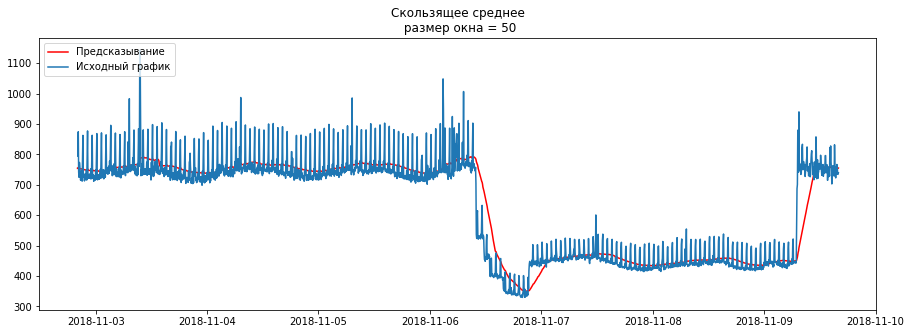

In [10]:

## Скользящее среднее
def plotMovingAverage(series, n):
    predict = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title("Скользящее среднее\n размер окна = {}".format(n))
    plt.plot(X,predict, "r", label="Предсказывание")
    plt.plot(X[n:],Y[n:], label="Исходный график")
    plt.legend(loc="upper left")
    #print(predict)
    print(mean_squared_error(Y[n:],predict[n:]),"Среднеквадр.ошибка")
    print(mean_absolute_error(Y[n:], predict[n:]),"Абс.ошибка")
plotMovingAverage(Y, 50)



In [11]:
X[12]


Timestamp('2018-11-02 17:00:00')

In [12]:
X_new=X.copy()[::12]
Y_new=Y.copy()[::12]



In [13]:
print(X_new.head())
print(Y_new.head())

0    2018-11-02 16:00:00
12   2018-11-02 17:00:00
24   2018-11-02 18:00:00
36   2018-11-02 19:00:00
48   2018-11-02 20:00:00
Name: timestamp, dtype: datetime64[ns]
0     782.19
12    763.94
24    759.13
36    753.88
48    748.24
Name: average, dtype: float64


In [14]:
for i in range(len(Y_new)):
    Y_new[12*i]=Y[12*i:12*(i+1)].sum()

In [15]:
print(Y_new)

0       9152.48
12      9096.65
24      9020.85
36      8978.71
48      9048.27
         ...   
1968    9032.03
1980    9055.49
1992    9136.90
2004    9046.65
2016     740.06
Name: average, Length: 169, dtype: float64


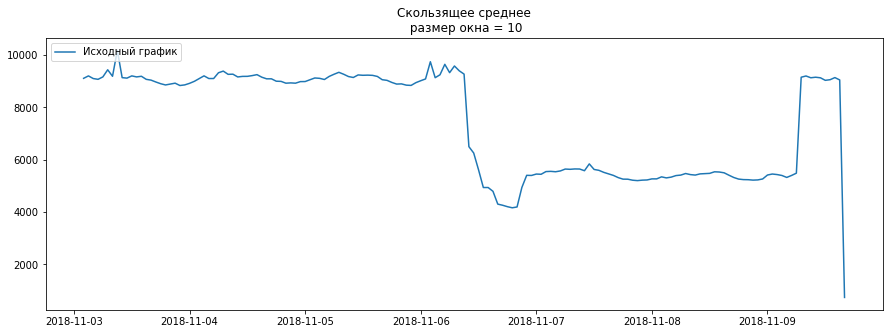

In [16]:
## Скользящее среднее
def plotMovingAverage(series, n):
    predict = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title("Скользящее среднее\n размер окна = {}".format(n))
    #lt.plot(X[::12],predict, "r", label="Предсказывание")
    plt.plot(X_new[n:],Y_new[n:], label="Исходный график")
    plt.legend(loc="upper left")
plotMovingAverage(Y_new, 10)

In [18]:
print(Y[-12:])

2005    728.94
2006    831.94
2007    768.56
2008    740.47
2009    723.00
2010    759.76
2011    734.44
2012    767.12
2013    762.75
2014    735.76
2015    734.50
2016    740.06
Name: average, dtype: float64


In [19]:
print(Y_new)

0       9152.48
12      9096.65
24      9020.85
36      8978.71
48      9048.27
         ...   
1968    9032.03
1980    9055.49
1992    9136.90
2004    9046.65
2016     740.06
Name: average, Length: 169, dtype: float64
